In [3]:
# FISRT BUILD MODEL

from keras import layers, models
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
# Load Data
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 8s 1us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
# Prepare Images

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [12]:
train_images.shape

(60000, 28, 28, 1)

In [13]:
test_images.shape

(10000, 28, 28, 1)

In [10]:
train_labels[0]

5

In [11]:
test_labels[2]

1

In [17]:
# Prepare Labels
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
# Compile the model

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
#  Train the model

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 84s 86ms/step - loss: 0.1708 - accuracy: 0.9463
Epoch 2/5
938/938 [==============================] - 66s 71ms/step - loss: 0.0461 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0318 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 60s 63ms/step - loss: 0.0243 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 56s 59ms/step - loss: 0.0189 - accuracy: 0.9940


In [21]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_accuracy

313/313 [==============================] - 3s 10ms/step - loss: 0.0292 - accuracy: 0.9909


0.9908999800682068

In [23]:
import numpy as np

pred_labels = model.predict(test_images)
pred_digit = np.argmax(pred_labels, axis=1)

In [38]:
test_digit = np.argmax(test_labels, axis=1)

In [41]:
test_digit[0]

7

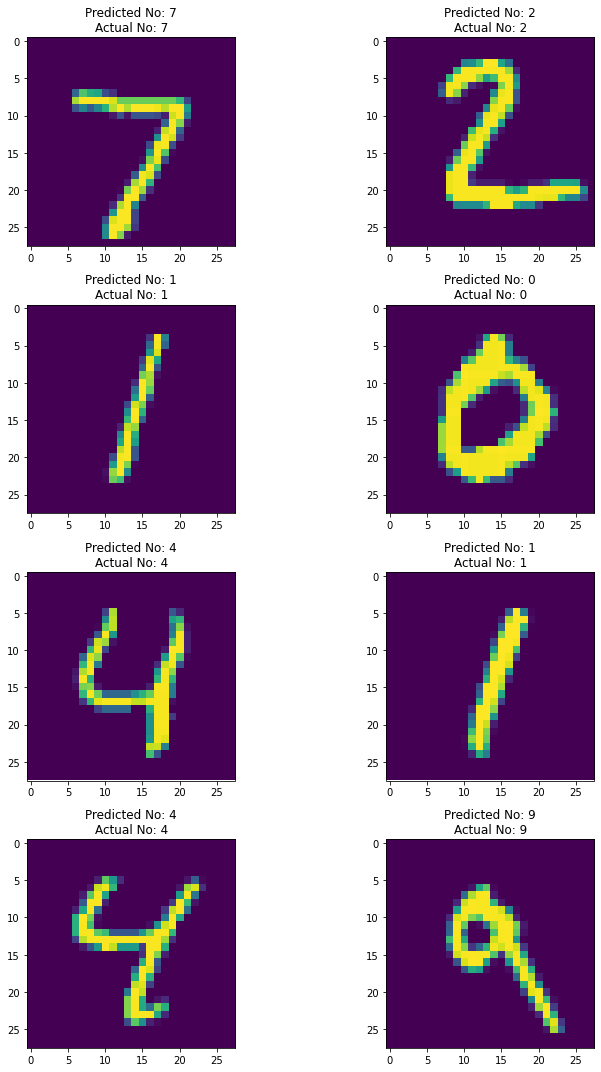

In [48]:
import matplotlib.pyplot as plt

count = 0
fig, axis = plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range(2):
        axis[i,j].imshow(test_images[count])
        axis[i,j].set_title("Predicted No: " + str(pred_digit[count]) + "\n" + "Actual No: " + str(test_digit[count]))
        plt.tight_layout()
        count += 1